<a href="https://colab.research.google.com/github/Aleksey-Gladkih/Test_Guide/blob/Secondary/LB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [ ]:
# 2. Получение и чтение Excel файла из облака
#https://drive.google.com/file/d/1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00/view?usp=sharing
url = "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00" 

# чтение данных, можно указать символ разделения столбцов (sep) и многие другие параметры, 
# index_col показывает, какой столбец нужно использовать как индекс строки в таблице
input_df = pd.read_csv(url, sep = ',', header = 0)
# вывод заголовка таблицы и первых пяти строк (сэмплов)
# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,Wind_power_MW,Solar_power_kW,Consumption_MW
0,65.655516,0.0000,34.70
1,69.111069,0.0000,32.79
2,72.134678,178.6368,33.09
3,75.590232,721.5360,33.63
4,68.247181,3752.5248,34.51


In [ ]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,Wind_power_MW,Solar_power_kW,Consumption_MW
8755,128.719366,0.0,45.47
8756,129.583255,0.0,40.72
8757,130.447143,0.0,39.11
8758,132.606864,0.0,36.91
8759,134.766585,0.0,35.58


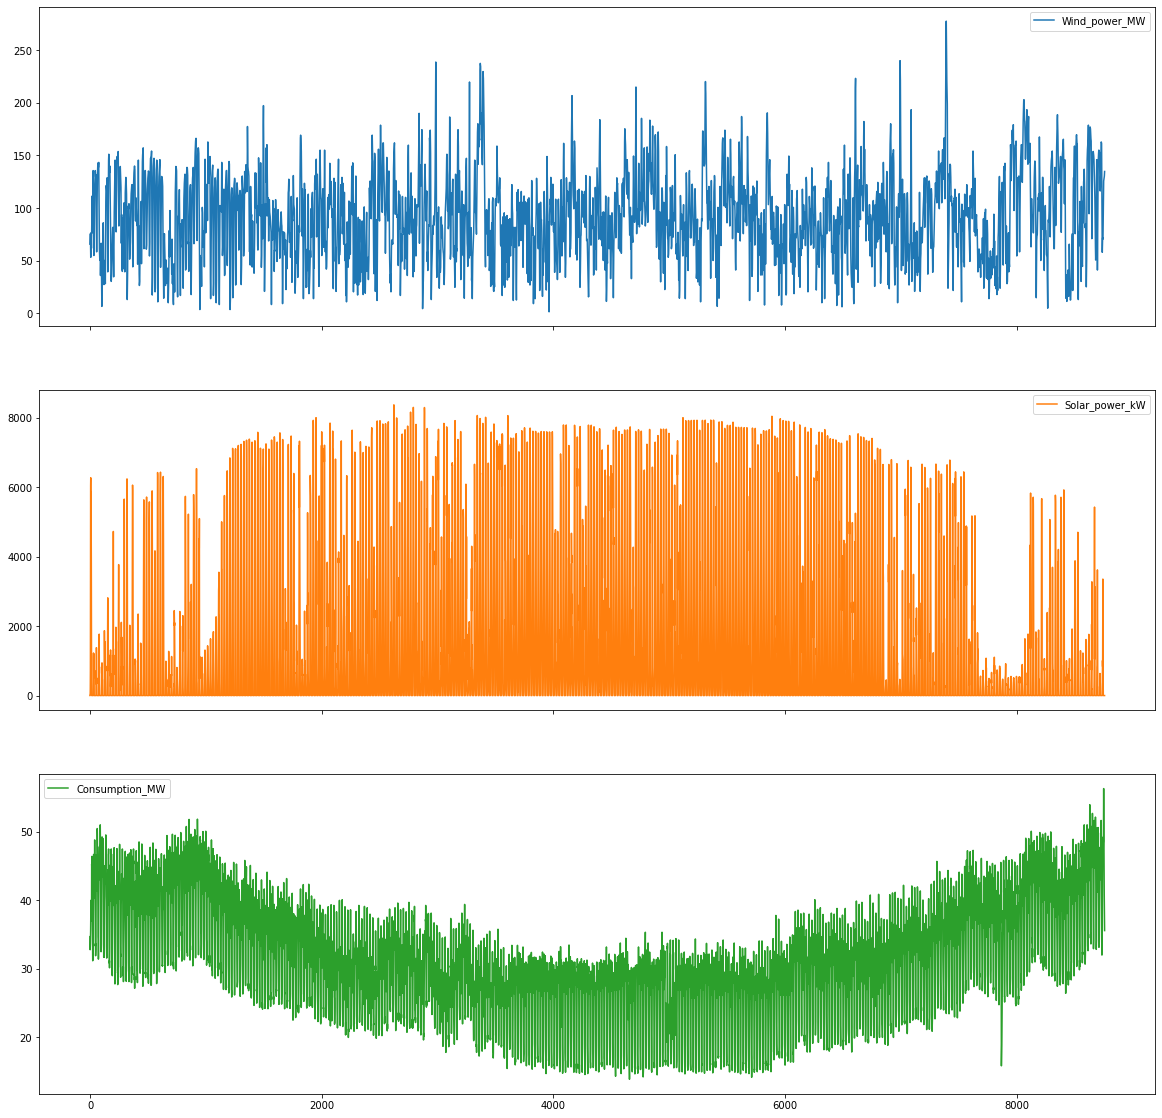

In [ ]:
# 5. Можно сразу построить графики
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

(8760,)


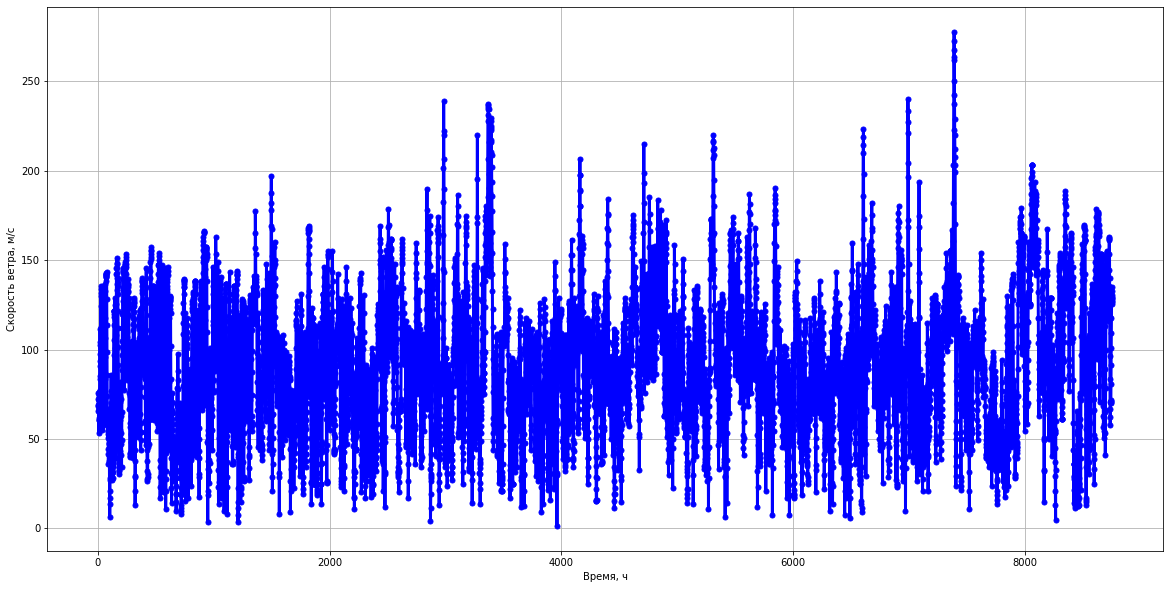

In [50]:
# 3. Берем только временной ряд скорости ветра в м/с
# iloc - выделяет из таблицы указанный фрагмент, в данном случае все строки и только первый столбец
Wind_power_MW = input_df.iloc[: , 0].values
print(Wind_power_MW.shape)
fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(Wind_power_MW[: ], linewidth = 3, markersize = 5, marker = 'o', color = 'blue')
ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.set_ylabel('Скорость ветра, м/с')

plt.show()

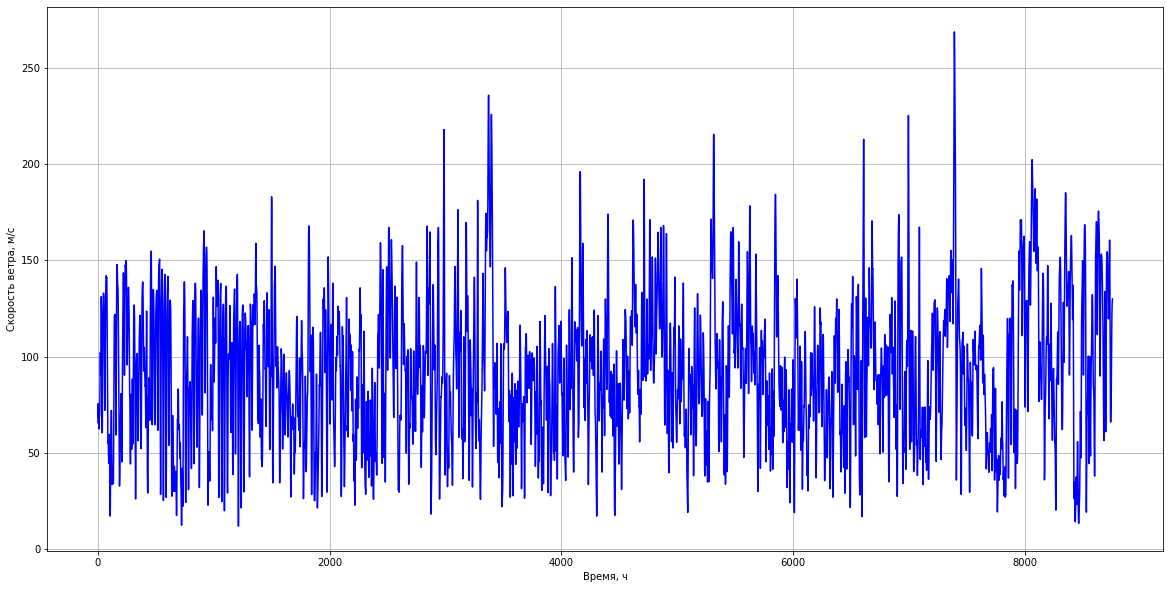

In [75]:
# 6. Пример обработки временного ряда точка за точкой (sample by sample)
# Рассмотренные выше функции применялись ко всем точкам ряда. Но бывает что нужна более сложная обработка.
# Рассмотрим пример очень примитивного прогнозирования скорости ветра на час вперед по следующей рекуррентной формуле
# forecast[i] = speed_[i - 1] * k + speed_[i - 2] * (1 - k)

k = 0.2

# создадим массив, заполненный нулями для записи прогноза, его длина равна длине wind_speed
forecast = np.zeros(len(Wind_power_MW)) 

# начальные два значения копируем, так как для прогноза на i-й час нужно значения скорости за два прошлых часа 
forecast[0:5] = Wind_power_MW[0:5]

# можно записать этот цикл более изящно, но сдесь записан для примера работы с индексами временного ряда
for i in range(5, len(Wind_power_MW)):
  # делаем прогноз на i-й час, так как он еще как будто не наступил, то можем использовать наблюдения только за прошлые часы (i - 1, i - 2, ...) 
  #forecast[i] =(Wind_power_MW[i - 1] + Wind_power_MW[i - 2] + Wind_power_MW[i-3]+Wind_power_MW[i-4]+Wind_power_MW[i-5])*k
  forecast[i] = Wind_power_MW[i - 5: i].mean()

# вывод графиков
fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(forecast, 'blue')


ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.set_ylabel('Скорость ветра, м/с') 
# полученный прогноз можно сохранить в текстовый csv файл или в Excel формат
data_frame = pd.DataFrame(forecast)
data_frame.to_excel('forecast.xlsx', index = False, header = ['Wind_power_MW_forecast'])
data_frame.to_csv('forecast.csv', index = False, header = ['Wind_power_MW_forecast'])

In [79]:
# 7. Для визуализации данных существует множество Python библиотек, обзор есть в https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N
# Рассмотрим одну из них - Bokeh https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(Wind_power_MW)), Wind_power_MW, line_width = 2,color = 'green')
p.scatter(np.arange(len(Wind_power_MW)), Wind_power_MW,color = 'green')
p.line(np.arange(len(Wind_power_MW)), forecast, line_width = 2, color = 'red')
p.scatter(np.arange(len(Wind_power_MW)), forecast, color = 'red')

show(p)

In [80]:
# полученный прогноз можно сохранить в текстовый csv файл или в Excel формат
data_frame = pd.DataFrame(moving_averages_list)
data_frame.to_excel('moving_averages_list.xlsx', index = False, header = ['Wind_power_MW'])
data_frame.to_csv('moving_averages_list.csv', index = False, header = ['Wind_power_MW'])